# 微分方程模型

## 微分方程模型简介

当我们描述实际对象的某些特性随时间（或空间）而演变的过程、分析它的变化规律、预测它的未来性态、研究它的控制手段时，通常要建立对象的动态模型。


事实上，在大家中学的课程中，解所谓应用题时我们已经遇到简单的建立**动态模型问题**，例如

```{admonition} 动态建模案例

- 一质量为$m$的物体自高$h$处自由下落，初速是0，设阻力与下落速度的平方成正比，比例系数为$k$，求下落速度随时间的变化规律
- 容器内有盐水$100  L$，内含盐$10 kg$，今以$3 L/min$的速度从一管放进净水，以$2 L/min$的速度从另一管抽出盐水，设容器内盐水浓度始终是均匀的，求容器内含盐量随时间变化的规律 
```

本节讨论的动态模型与这些问题的主要区别是，所谓微分方程应用题大多是物理或几何方面的典型问题，假设条件已经给出，只需用数学符号将已知规律表示出来，即可列出方程，求解的结果就是问题的答案，答案是唯一的。 


而本节的模型主要是非物理领域的实际问题，要分析具体情况或进行类比才能给出假设条件。作出不同的假设，就得到不同的方程，所以是**事先没有答案的，求解结果还要用来解释实际现象并接受检验**。

我们首先要弄明白，**什么是微分方程？**


```{tip}
微分方程是含有微分的方程,由此需要解释两个问题
1. 什么是微分?代表什么含义？
2. 什么是方程?

- 方程是指**含有未知数的等式**。使等式成立的未知数的值称为“解”或“根”。
- 微分是对函数的**局部变化率**的一种线性描述。微分可以近似地描述当函数自变量的取值作足够小的改变时，函数的值是怎样改变的。
```







例如，牛顿第二定律方程就是一个最典型的微分方程

$$
f=m a=m \frac{\mathrm{d} v}{\mathrm{d} t}
$$

例如，这是一个一阶微分方程初值问题

$$
\left\{\begin{array}{l}
{\dfrac{\mathrm{d} y}{\mathrm{d} x}=2} \\
{y(0)=1}
\end{array}\right.
$$

大家应该可以非常快速地看出它的解

:::{admonition,dropdown,tip} 答案

$$
y=2x+1
$$

:::

微分方程理论博大精深，我们本节仅就几个最经典的微分方程模型进行讨论，希望能够帮助大家理解微分方程建模的基本思想。我们将通过三个模型案例展开微分方程建模这一课程。他们分别是

- 人口增长模型
- 传染病模型
- 猎物-捕食者模型


## 人口增长模型

认识人口数量的变化规律，建立人口模型，作出较准确的预报，是有效控制人口增长的前提。

下表给出了近两个世纪的美国人口统计数据，我们以此研究人口增长模型。

In [1]:
import pandas as pd
df = pd.DataFrame()
df["年份"] = [i for i in  range(1790,2010,10)]
df["人口"] = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
df.T

0       1       2       3       4       5       6       7       8   \
年份  1790.0  1800.0  1810.0  1820.0  1830.0  1840.0  1850.0  1860.0  1870.0   
人口     3.9     5.3     7.2     9.6    12.9    17.1    23.2    31.4    38.6   

        9   ...      12      13      14      15      16      17      18  \
年份  1880.0  ...  1910.0  1920.0  1930.0  1940.0  1950.0  1960.0  1970.0   
人口    50.2  ...    92.0   106.5   123.2   131.7   150.7   179.3   204.0   

        19      20      21  
年份  1980.0  1990.0  2000.0  
人口   226.5   251.4   281.4  

[2 rows x 22 columns]

先简单通过散点图看一下人口的增长模式。

Text(0, 0.5, 'Population(Million)')

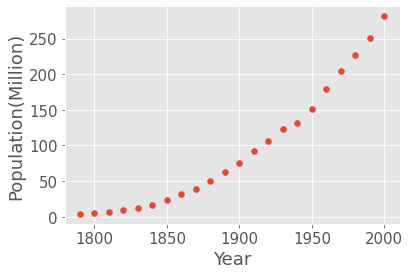

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  #设置绘图风格为ggplot
matplotlib.rcParams['font.size'] = 15  #设置全文绘图字体大小为15号字

year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
plt.scatter(year,population)   #绘制散点图
plt.xlabel("Year")
plt.ylabel("Population(Million)")

### 指数增长模型

最简单的人口增长模型是公认的：记今年人口为$x_0$,$k$年后人口为$x_k$， 年增长率为$r$，则

$$
x_{k}=x_{0}(1+r)^{k}
$$

显然，这个公式的基本条件是年增长率$r$保持不变,这个假设显然过于简单了。

200多年前英国人口学家T. Malthus (1766-1834)调查了英国100多年的人口统计资料，得出了人口增长率不变的假设，并据此建立了著名的人口**指数增长模型**。
记时刻$t$的人口为$x(t)$，当考察一个国家或一个较大地区的人口时，$x(t)$是一个很大的整数。为了利用微积分这一数学工具，将$x(t)$视为连续、可微函数， 记初始时刻$(t=0)$的人口为$x_0$，假设人口增长率为常数$r$，即单位时间内$x(t)$的增量为等于$r$乘以$x(t)$，于是得到$x(t)$满足微分方程



$$
\frac{\mathrm{d} x}{\mathrm{d} t}=r x, x(0)=x_{0}
$$

由这个方程,通过分离变量法很容易解出其解析解为

$$
x(t)=x_{0} e^{r t}
$$

$r>0$时，上式表示人口将按指数规律随时间无限增长，称为指数增长模型．

Text(0, 0.5, 'Population')

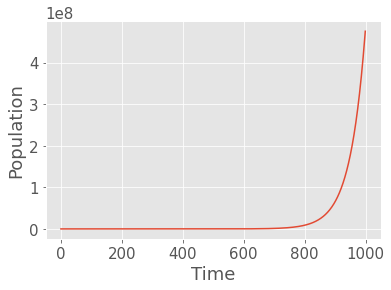

In [3]:
# 指数增长模型的绘图
import numpy as np
x0 = 1  # 初始人口数
r = 0.02    # 增长率
t = [i for i in range(1000)] # 时间列表
x_t = [x0 * np.exp(r * time) for time in t] # 人口增长记录
plt.plot(t, x_t) # 绘图
plt.xlabel("Time") # 加横坐标label
plt.ylabel("Population") # 加纵坐标label

**模型的参数估计、检验和预报**


为了估计指数增长模型中的参数$r$和$x_0$，需将原式取对数，得

$$
y=r t+a
$$

其中，

$$
y=\ln x, a=\ln x_{0}
$$

Text(0, 0.5, '$\\ln(x)$')

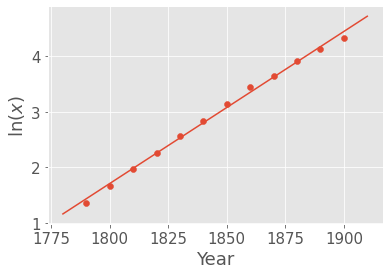

In [4]:
from sklearn.linear_model import LinearRegression # 导入LinearRegression方法
ln_population = np.log(population)  # 对人口取对数，得到y
plt.scatter(year[0:12],ln_population[0:12])  # 绘制1790 - 1900的y-t图，并进行线性回归

## 使用LinearRegression 进行线性回归
lrModel = LinearRegression()
lrModel.fit(np.array(year[0:12]).reshape(-1,1),ln_population[0:12])
ln_population_fit = [ lrModel.intercept_  +  lrModel.coef_  *i for i in range(1780,1920,10)  ]
plt.plot(range(1780,1920,10),ln_population_fit) # 将线性回归以后的直线绘制在散点图上
plt.xlabel("Year")
plt.ylabel(r'$\ln(x)$')

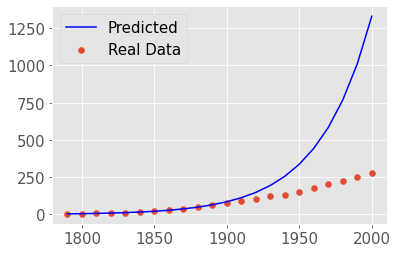

In [5]:
## 我们把以上的代码合起来，放在一起。
## 对比一个世纪后的预测值和真实值

#输入原始数据
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]  
plt.scatter(year,population,label = 'Real Data')

#进行参数的线性拟合
from sklearn.linear_model import LinearRegression
ln_population = np.log(population)
lrModel = LinearRegression()
lrModel.fit(np.array(year[0:12]).reshape(-1,1),ln_population[0:12])
ln_population_fit = [ lrModel.intercept_  +  lrModel.coef_  *i for i in range(1780,1920,10)  ]

#将预测值和真实值进行对比
r = lrModel.coef_
x0 = np.exp(lrModel.intercept_)
pop_predicted = [x0 * np.exp(lrModel.coef_ * time) for time in year]
plt.plot(year,pop_predicted,'b',label = 'Predicted')
plt.legend()

显然，使用1790 - 1900的数据得到的指数模型预测效果不好，不能够准确地预测20世纪的人口增长情况。

为此，我们可以使用全部的1790 - 2000的数据进行预测。效果如下

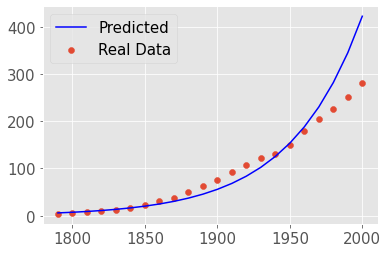

In [6]:
#输入原始数据
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
plt.scatter(year,population,label = 'Real Data')


#进行参数的线性拟合
from sklearn.linear_model import LinearRegression
ln_population = np.log(population)
lrModel = LinearRegression()
lrModel.fit(np.array(year[:]).reshape(-1,1),ln_population[:])
ln_population_fit = [ lrModel.intercept_  +  lrModel.coef_  *i for i in range(1780,2010,10)  ]


#将预测值和真实值进行对比
r = lrModel.coef_
x0 = np.exp(lrModel.intercept_)
pop_predicted = [x0 * np.exp(lrModel.coef_ * time) for time in year]
plt.plot(year,pop_predicted,'b',label = 'Predicted')
plt.legend()

- 历史上，指数增长模型与19世纪以前欧洲一些地区人口统计数据可以很好地吻合，迁往加拿大的欧洲移民后代入口也大致符合这个模型。另外，用它作短期人口预测可以得到较好的结果。**显然这是因为在这些情况下，人口增长率是常数这个基本假设大致成立。**

- 但是长期来看，任何地区的人口都不可能无限增长，即指数模型不能描述、也不能预测较长时期的人口演变过程。这是因为，人口增长率事实上是在不断地变化着排除灾难、战争等特殊时期，一般说来，当人口较少时 ，增长较快，即增长率较大；人口增加到一定数量以后，增长就会慢下来，即增长率变小。如果根据上面给出的数据计算一下美国人口的年增长率，可以看到增长率从19世纪开始就基本上在缓慢下降。如果用一个平均的年增长率作为$r$，用指数增长模型描述美国人口的变化，会发现结果与实际数据相差很大。

- 看来，为了使人口预报特别是长期预报更好地符合实际情况，必须修改指数增长模型关于人口增长率是常数这个基本假设。

Text(0, 0.5, '$r$')

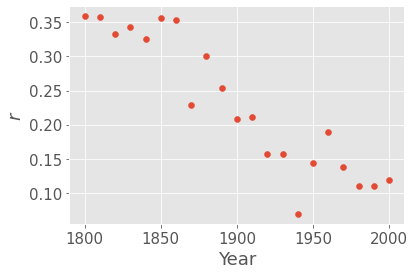

In [7]:
## 增长率可视化
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
## 计算增长率
rate = []
for i in range(len(population)-1):
    rate.append((population[i+1] - population[i])/ population[i])
## 可视化
plt.scatter(year[1:],rate)
plt.xlabel("Year")
plt.ylabel(r'$r$')

### 阻滞增长模型一logistic模型

分析人口增长到一定数量后增长率下降的主要原因，人们注意到，自然资源、环境条件等因素对人口的增长起着阻滞作用，并且**随着人口的增加，阻滞作用越来越大**。所谓阻滞增长模型就是考虑到这个因素，对指数增长模型的基本假设进行修改后得到的。

阻滞作用体现在对人口增长率$r$的影响上，使得$r$随着人口数$x$的增加而下降。若将$r$表示为$x$的函数$r(x)$，则它应是减函数。于是


$$
\frac{d x}{d t}=r(x) x, x(0)=x_{0}
$$


对$r(x)$的一个最简单的假定是，设$r(x)$为$x$的线性函数，即

$$
r(x)=r-s x(r, s>0)
$$


这里$r$称固有增长率，表示人口很少时（理论上是$x = 0$)的增长率．为了确定系数$s$的意义，引人自然资源和环境条件所能容纳的最大人口数量$x_m$，称人口容量．当 $x=x_m$时人口不再增长，即增长率$r(x_m)=0$

于是


$$
r(x)=r\left(1-x / x_{m}\right)
$$


带回原方程，得到

$$
\frac{d x}{d t}=r x\left(1-\frac{x}{x_{m}}\right), \quad x(0)=x_{0}
$$


方程右端的因子$rx$体现人口自身的增长趋势，因子$(1-\dfrac{x}{x_m})$则体现了环境和资源对人口增长的阻滞作用．


显然．$x$越大，前一因子越大，后一因子越小，人口增长是两个因子共同作用的结果，上式称为阻滞增长模型,其解析解为


$$
x(t)=\frac{x_{m}}{1+\left(\frac{x_{m}}{x_{0}}-1\right) e^{-r t}}
$$

Text(0, 0.5, '$\\frac{\\mathrm{d}x}{\\mathrm{d}t}$')

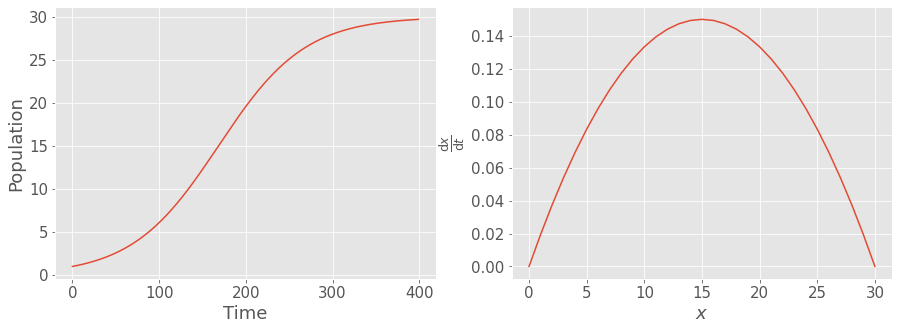

In [8]:
## 阻滞增长模型的绘图

## 输入初始参数
x0 = 1
xm = 30
r = 0.02

# 获得x 和 f(x)
t = [i for i in range(400)]
x_t = [xm * (1 + (xm/x0 -1)*np.exp(- r * time))**(-1) for time in t] 

# 绘图1:增长曲线
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(t,x_t)
plt.xlabel("Time")
plt.ylabel("Population")

# 绘图2:增长速度
plt.subplot(1,2,2)
x = [xm*i/30 for i in range(31) ]
deri_x = [r * xx * (1 - xx/xm) for xx in x]
plt.plot(x,deri_x)
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}$')

上面的阻滞增长模型，是荷兰生物数学家Verhulst 19世纪中叶提出的．它不仅能够大体上描述人口及许多物种数量（如森林中的树木、鱼塘中的鱼群等）的变化规律，而且在社会经济领域也有广泛的应用，例如**耐用消费品的销售**就可以用它来描述。基于这个模型能够描述一些事物符合逻辑的客观规律，人们常称它为logistic模型。

**模型的参数估计、检验和预报**

用阻滞增长模型进行人口预报，先要作参数估计．除了初始人口$x_0$外，还要估计$r$和$x_m$．它们可以用人口统计数据拟合得到，也可以辅之以专家的估计。

原方程可以写为

$$
\frac{\frac{\mathrm{d} x}{\mathrm{d} t}}{x}=r-s x, s=\frac{r}{x_{m}}
$$

上式左端可以从实际人口数据用**数值微分**算出，右端对参数$r$,$s$是线性的,可借助最小二乘法获得。（什么是数值微分:差分）

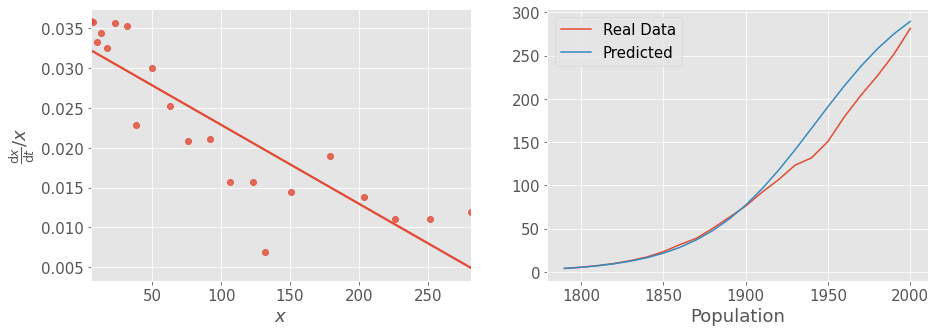

In [9]:
## 对比一个世纪后的预测值和真实值
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 输入初始数据
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
y = []
for i in range(len(population)-1):
    y.append( (population[i+1] - population[i])/10 / population[i]  )
plt.figure(figsize = (15,5))

# 可视化线性回归结果
plt.subplot(1,2,1)
sns.regplot(population[1:],y,ci = 0)
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}/{x}$')
plt.xlabel(r'$x$')
lrModel = LinearRegression()
lrModel.fit(np.array(population[7:-1]).reshape(-1,1),y[6:-1])
r = lrModel.intercept_
xm = r/(- lrModel.coef_)


# 可视化拟合结果
plt.subplot(1,2,2)
x0 = population[0]
plt.plot(year,population,label = 'Real Data')
pop_predicted = [xm * (1 + (xm/x0 -1)*np.exp(- r * (time - 1790)))**(-1) for time in year]
plt.plot(year,pop_predicted,label = 'Predicted')
plt.xlabel('Year')
plt.xlabel('Population')
plt.legend()

可以看出，这个模型整体拟合效果不错。我们可以用模型计算2000年的人口，与已知的实际数据比较，来检验模型是否合适。

除此之外，我们还可以考虑使用之前讲过的**非线性最小二乘拟合**进行人口的预测。

/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


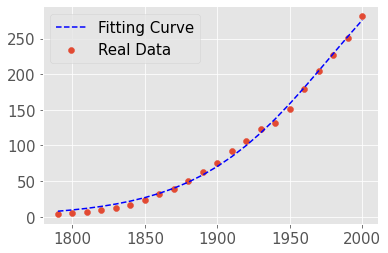

In [10]:
## 复习前面学到的预测模型中的非线性拟合
plt.scatter(year,population,label = 'Real Data')
def logistic(t,xm,x0,r):
    return xm * (1 + (xm/x0 -1)*np.exp(- r * (t-1790) ))**(-1)
from scipy.optimize import curve_fit 
#popt1, pcov1 = curve_fit(logistic, year, population,p0 = [1,0,0]) 
popt1, pcov1 = curve_fit(logistic, year, population,p0 = [1,1,1]) 

#popt数组中，三个值分别是待求参数a,b,c  
y2 = [logistic(i, popt1[0],popt1[1],popt1[2]) for i in year]
plt.plot(year,y2,'b--',label = 'Fitting Curve')  
plt.legend()

可以看到，非线性拟合的误差更小，请解释为什么？ 为什么我们不直接用非线性拟合？

## 传染病模型

**问题的提出：**医生们发现，在一个民族或地区，当某种传染病流传时，波及到的总人数大体上保持为一个常数。即既非所有人都会得病也非毫无规律，两次流行（同种疾病）的波及人数不会相差太大。如何解释这一现象呢？试用建模方法来加以证明。

### 指数模型
定义已感染人数为$i(t)$，假设每个病人单位时间有效接触（足以使人致病）的人数为$\lambda$，那么，在时间段$\Delta t$内，病人的增量可以用如下的公式进行计算

$$
i(t+\Delta t) - i(t)  = \lambda i(t)\Delta t
$$

将$i(t)$移到等式的右边，我们得到如下的递推公式

$$
i(t+\Delta t)  = i(t) +  \lambda i(t)\Delta t
$$

以上递推公式意味着，我们可以通过当前时刻的病人人数和致病参数$\lambda$，计算得到$\Delta t$时间后的病人人数，将以上思想在Python中进行实现，代码如下。

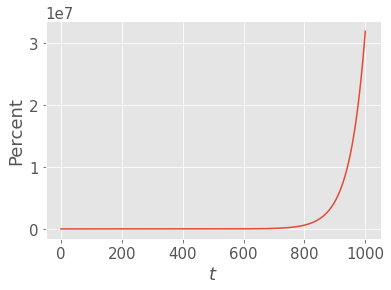

In [11]:
def exp():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    i_list = []
    i0 = 0.08; # 初始有8%的人患病
    i_list.append(i0)
    Tot_Time = 10
    TotStep = int(Tot_Time/deltaT)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT
        i_list.append(i_new)
    # 绘图
    plt.plot(i_list)
    plt.xlabel(r"$t$")
    plt.ylabel('Percent')
exp()

从中我们可以看到病人的增长是指数级的，在短短十天后，已经有3000万人患病！这显然不符合实际情况的，那么问题出在哪里了呢？

实际上，若病人解除的是病人，并不能够使病人再次患病，实际上以上的算法导致了**重复计数现象**的发生。

解决办法：必须区分已感染者和未感染者。

### SI模型

现在我们将人群分成两个群体：已感染者（病人，**I**nfected）和未感染者（健康者，**S**uspect），该模型称为SI模型，模型假设：
- 在研究时间内，不考虑死亡率和出生率，即总人数$N$不变，病人和健康人的比例分别为$i(t)$和$s(t)$
- 每个病人在单位时间内有效接触并致病的人数为$\lambda$，且只有接触健康人才会致病，称$\lambda$为日接触率

仿照指数模型里面的建模方法，在时间段$\Delta t$内，病人的增量可以用如下的公式进行计算

$$
N[i(t+\Delta t)-i(t)]=[\lambda s(t)] N i(t) \Delta t
$$

消去$N$，再将$i(t)$移到等式的右边，我们得到如下的递推公式

$$
i(t+\Delta t)  = i(t) +  \lambda i(t)s(t)\Delta t
$$

同样地，我们可以通过当前时刻的病人人数和致病参数$\lambda$，计算得到$\Delta t$时间后的病人人数，将以上思想在Python中进行实现，代码如下：

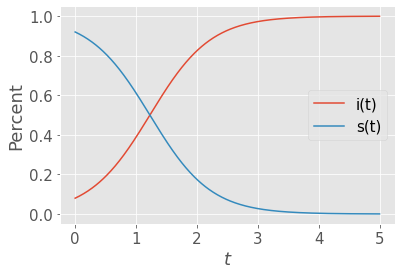

In [12]:
def SI():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    i_list = []
    s_list = []
    i0 = 0.08; # 初始有8%的人患病
    i_list.append(i0)
    s_list.append(1 - i0)
    Tot_Time =5
    TotStep = int(Tot_Time/deltaT)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT * s_list[-1]
        i_list.append(i_new)
        s_list.append(1- i_new)
    Time = [i * deltaT for i in range(TotStep + 1)]
    ## 可视化传染过程
    plt.plot(Time,i_list,label = 'i(t)')
    plt.plot(Time,s_list,label = 's(t)')
    plt.xlabel(r"$t$")
    plt.ylabel('Percent')
    plt.legend()
SI()

从SI模型我们可以看到，病人比例不再会出现"指数爆炸"的情况，在$t \rightarrow \infty$时最大患病比例为1。在SI模型中，病人数量的增长曲线是一个典型的S型曲线，又称为Logistic曲线，该曲线在生物学上经常被用来描述物种的增长模式。

然而，SI模型的结论告诉我们，**无论$\lambda$多么小，最终人群都会患病**，这显然也是不符合实际情况的。这主要是因为病人患病后无法被治愈。

### SIS模型

现在我们继续将人群分成两个群体：已感染者（病人，**I**nfected）和未感染者（健康者，**S**uspect），但是病人被治愈后可以重新患病。


该模型称为SIS模型，模型假设：
- 在研究时间内，不考虑死亡率和出生率，即总人数$N$不变，病人和健康人的比例分别为$i(t)$和$s(t)$
- 每个病人在单位时间内有效接触并致病的人数为$\lambda$，且只有接触健康人才会致病，称$\lambda$为日接触率
- **病人每天治愈的比例为$\mu$，称为日治愈率**

在时间段$\Delta t$内，病人的增量可以用如下的公式进行计算

$$
N[i(t+\Delta t)-i(t)]=[\lambda s(t)] N i(t) \Delta t - \mu N i(t) \Delta t
$$

消去$N$，再将$i(t)$移到等式的右边，我们得到如下的递推公式

$$
i(t+\Delta t)  = i(t) +  \lambda i(t)s(t)\Delta t - \mu i(t) \Delta t
$$

同样地，我们可以通过当前时刻的病人人数和致病参数$\lambda$,以及治愈参数$\mu$，计算得到$\Delta t$时间后的病人人数，将以上思想在Python中进行实现，代码如下：

In [13]:
import matplotlib.pyplot as plt

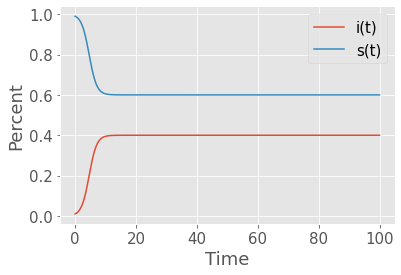

In [14]:
def SIS():
    i0 = 0.01; # 初始有1%的人感染
    lamb = 2
    s0 =  1- i0;
    mu = 1.2;
    i_list = []
    s_list = []
    i_list.append(i0)
    s_list.append(s0)
    TotTime = 100
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu *  i_list[-1]*TimeStep
        i_list.append(i_new)
        s_list.append(1-i_new)
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list)
    plt.plot(Time,s_list)
    plt.xlabel("Time")
    plt.ylabel("Percent")
    plt.legend(["i(t)","s(t)"])
SIS()

### SIR 模型

有的传染病具有免疫性，病人治愈后即移出系统，称为移出者。

我们将人群分成三个群体：已感染者（病人，**I**nfected）、未感染者（健康者，**S**uspect）和免疫者（**R**emoved），病人被治愈后永久免疫。

在时间段$\Delta t$内，病人的增量可以用如下的公式进行计算

$$
N[i(t+\Delta t)-i(t)]=[\lambda s(t)] N i(t) \Delta t - \mu N i(t) \Delta t
$$

健康者的增量为

$$
N[s(t+\Delta t)-s(t)]=-[\lambda s(t)] N i(t) \Delta t
$$

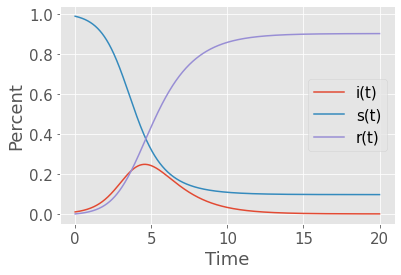

In [15]:
def SIR():
    i0 = 0.01; # 初始有1%的人感染
    r0 = 0;# 初始没有人免疫
    lamb = 1.8
    s0 =  1- i0;
    mu = 0.7;
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0)
    s_list.append(s0)
    r_list.append(r0)
    TotTime = 20
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu *  i_list[-1]*TimeStep
        s_new = s_list[-1] - lamb * s_list[-1] * i_list[-1]*TimeStep
        i_list.append(i_new)
        s_list.append(s_new)
        r_list.append(1-i_new-s_new)
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list)
    plt.plot(Time,s_list)
    plt.plot(Time,r_list)
    plt.xlabel("Time")
    plt.ylabel("Percent")
    plt.legend(["i(t)","s(t)","r(t)"])
SIR()

### 计算结果的对比

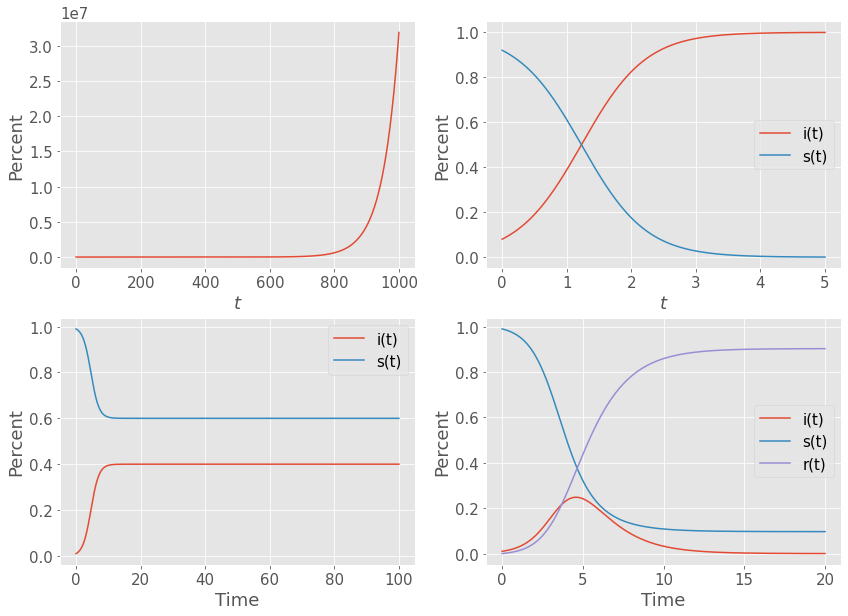

In [16]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
exp()
plt.subplot(2,2,2)
SI()
plt.subplot(2,2,3)
SIS()
plt.subplot(2,2,4)
SIR()
plt.savefig('test2.pdf')

观察四个结果图？你能回忆四种模型的区别吗？

## 生态学中的猎物（食饵）-捕食者模型

### Volterra 模型

一战期间，人们捕获的鲨鱼比例大幅上升，可以按照尝试，由于战争，人们停止捕捞，应该普通的鱼类和鲨鱼数量都会上升，为什么单单鲨鱼数量上升如此明显呢？ 为了解释这一问题，生物学家D. Ancona 向数学家Volterra求助，Volterra借用微分方程理论，成功地解释这个现象。

食饵（食用鱼）和捕食者（鲨鱼）在时刻$t$的数量分别记为$x(t),y(t)$，因为大海中资源丰富，假设当食饵独立生存时以指数规律增长，增长率为$r$,于是
$$
\dfrac{\mathrm{d}x}{\mathrm{d}t} = rx
$$
但是捕食者的存在，使得食饵的增长率减小，设减少率与捕食者的数量成正比，于是$x(t)$满足方程

$$
\dfrac{\mathrm{d}x}{\mathrm{d}t} = x(r-ay) = rx - axy
\tag{1}
$$


比例系数$a$反映捕食者捕食食饵的能力。

捕食者离开食饵无法生存，设它独自存在时死亡率为$d$,即

$$
\dfrac{\mathrm{d}y}{\mathrm{d}t} = -dy
$$

而食饵的存在为捕食者提供了食物，相当于使捕食者的死亡率降低，且促使其增长。设增长率与食饵数量成正比，于是$y(t)$满足

$$
\dfrac{\mathrm{d}y}{\mathrm{d}t} = y (-d + bx) = -dy + bxy
\tag{2}
$$

比例系数$b$反映食饵对捕食者的供养能力。

将以上推导的结果写在一起，得到

$$
\begin{cases}
\dfrac{\mathrm{d}x}{\mathrm{d}t} = x(r-ay) = rx - axy \\
\dfrac{\mathrm{d}y}{\mathrm{d}t} = y (-d + bx) = -dy + bxy
\end{cases}
$$

这就是自然环境中食饵和捕食者之间的依存和制约的关系。这里没有考虑种群自身的阻滞增长作用，是Volterra提出的最简单的模型。

数值递推公式为

$$
\begin{cases}
x(t+\Delta t) = x(t) + \Delta t\left[rx(t) - ax(t)y(t)\right]\\
y(t+\Delta t) = y(t) + \Delta t\left[-dy(t) + bx(t)y(t)\right]\\
\end{cases}
$$

/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39135 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/qe

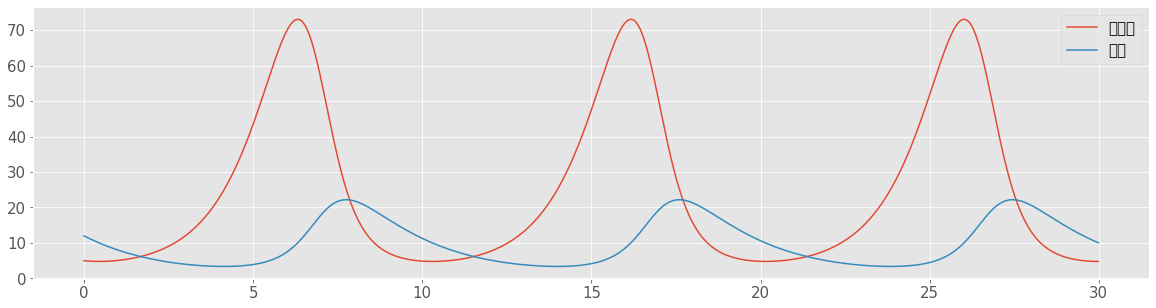

In [17]:
## Volterra 模型的数值求解示例

# 输入初始参数
r = 1
d = 0.5
a = 0.1
b = 0.02
x0 = 5
y0 = 12
deltaT = 0.01
TotTime = 30
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0)
ylist.append(y0)
TimeList = [i*deltaT for i in range(int(timeStep))]

# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] +deltaT * (r *xlist[-1] - a*xlist[-1]*ylist[-1] ) )
    ylist.append(ylist[-1] +deltaT * (-d *ylist[-1] + b*xlist[-1]*ylist[-1] ) )
# 变化过程可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1],label = '食用鱼')
plt.plot(TimeList,ylist[:-1],label = '鲨鱼')
plt.legend()

可以猜测，$x(t),y(t)$是周期函数，与此相应地，相轨线$y(x)$是封闭曲线。

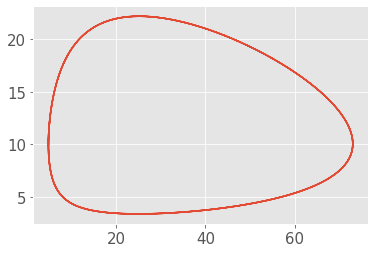

In [18]:
# 绘制相轨线
plt.plot(xlist,ylist)

在数值解中我们看到，$x(t),y(t)$一个周期的平均值为$\overline x=25,\overline y = 10$, 这个数值与稳定平衡点刚好相等。

$$
\overline x = x_0 = \frac{d}{b}, \quad \overline y = y_0 = \frac{r}{a}
$$

当然这也是能够通过解析方法来证明的

$$
x(t)=\frac{1}{b}\left(\frac{\dot{y}}{y}+d\right)
$$

$$
\bar{x}=\frac{1}{T} \int_{0}^{T} x(t) \mathrm{d} t=\frac{1}{T}\left[\frac{\ln y(T)-\ln y(0)}{b}+\frac{d T}{b}\right]=\frac{d}{b}
$$

类似的，我们有

$$
\bar{y}=\frac{r}{a}
$$

注意到，$r,d,a,b$在生态学上的意义，上述结果表明，

- 捕食者的数量(用一个周期内的平均值$\overline y$代替)与食饵增长率$r$成正比，与他掠食食饵的能力$a$成反比；
- 食饵的数量（用一个周期内的平均值$\overline x$代替）与捕食者死亡率$d$成正比，与他供养捕食者的能力$b$成反比。

Volterra用这个模型来解释生物学家D'Ancona提出的问题：

我们在上面的模型中引入人为捕捞的影响，引入捕捞量系数$e$，相当于食饵增长率由$r$下降为$r-e$，而捕食者死亡率由$d$上升为$d+e$,用$\overline {x_1},\overline {y_1}$表示这种情况下食用鱼（食饵）和鲨鱼（捕食者）的平均数量，则套用上面的公式可知

$$
\overline {x_1} = \dfrac{d+e}{b}  \quad \overline {y_1} = \dfrac{r-e}{a}
$$

显然，$\overline {x_1} > x_1,  {y_1} < \overline {y_1}$

战争期间捕获量下降，即捕获系数变为$e'<e$，于是食用鱼和鲨鱼的数量变为

$$
\overline {x_1} = \dfrac{d+e'}{b}  \quad \overline {y_1} = \dfrac{r-e'}{a}
$$

显然，$\overline {x_2} < \overline {x_1},  \overline {y_2} > \overline {y_1}$，这正说明战争期间鲨鱼的比例会有明显的增加。

### 加入logistic项的Volterra模型

尽管Volterra模型可以解释一些现象，但是它作为近似反映现实对象的一个数学模型，必然存在不少局限性．
比如，许多生态学家指出，多数食饵－捕食者系统都观察不到Volterra模型 显示的那种周期震荡，而是趋向某种平衡状态，即系统存在稳定平衡点．实际上， 只要在Volterra模型中加入考虑自身阻滞作用的logistic项，就可以模拟这一现象。

$$
\begin{aligned}
&\dot{x}_{1}(t)=r_{1} x_{1}\left(1-\frac{x_{1}}{N_{1}}-\sigma_{1} \frac{x_{2}}{N_{2}}\right)\\
&\dot{x}_{2}(t)=r_{2} x_{2}\left(-1+\sigma_{2} \frac{x_{1}}{N_{1}}-\frac{x_{2}}{N_{2}}\right)
\end{aligned}
$$

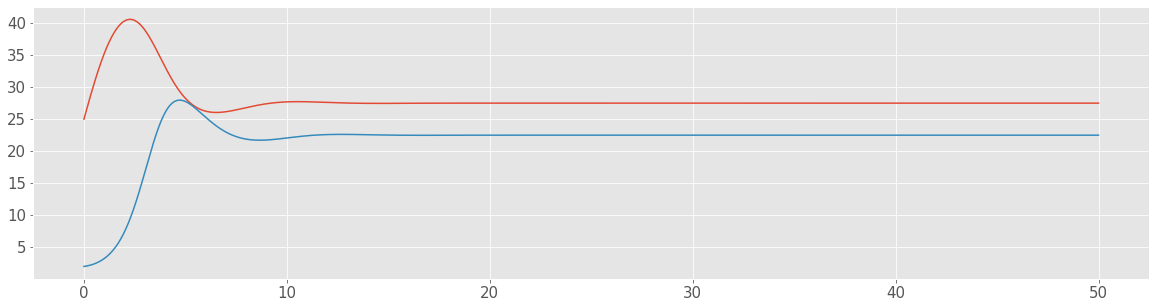

In [19]:
## 加入logistic项的Volterra模型

# 输入初始参数
r1 = 0.2
r2 = 0.1
N1 = 50
N2 = 60
sigma1 = 1.2
sigma2 = 2.5
x0 = 25
y0 = 2
deltaT = 0.01
TotTime = 50
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0)
ylist.append(y0)
TimeList = [i*deltaT for i in range(int(timeStep))]

# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] +deltaT * (r *xlist[-1])*(1 - xlist[-1]/N1 - sigma1 * ylist[-1]/N2))
    ylist.append(ylist[-1] +deltaT * (r *ylist[-1])*(-1 +sigma2* xlist[-1]/N1 -  ylist[-1]/N2))

# 结果可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1])
plt.plot(TimeList,ylist[:-1])

## 练习

考虑种群竞争模型

$$
\left\{
\begin{aligned}
& \dfrac{\mathrm{d}x_1}{\mathrm{d}t}=r_{1} x_{1}\left(1-\frac{x_{1}}{N_{1}}-\sigma_{1} \frac{x_{2}}{N_{2}}\right)\\
& \dfrac{\mathrm{d}x_2}{\mathrm{d}t}=r_{2} x_{2}\left(1-\sigma_{2} \frac{x_{1}}{N_{1}}-\frac{x_{2}}{N_{2}}\right)
\end{aligned}\right.
$$

取$r_1 = 0.2, r_2 = 0.3, \sigma_1 = 1.2,\sigma_2 = 0.5,N_1 = 100,N_2 = 70, x_1(0) = 30,x_2(0) = 40$,使用本节课程学到的数值方法研究两个种群的发展模式。部分代码已经在下面给出，请大家补全